<div align='center'>
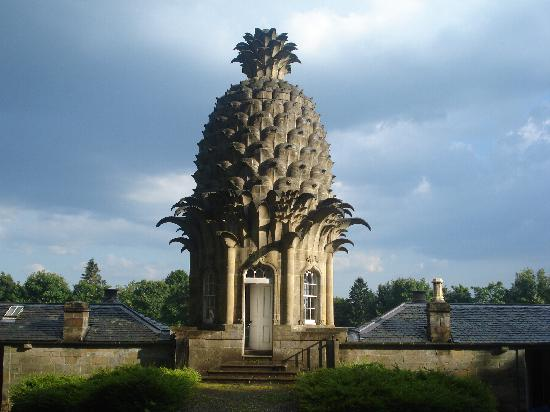
</div>

# Kaggle Competition - 🏠 Prices; Group C

## Introduction?
Contexte, classe, travail de groupe, découverte de l'apprentissage automatique et de 🐍


Apprentissage supervisé?








## CRISP-DM
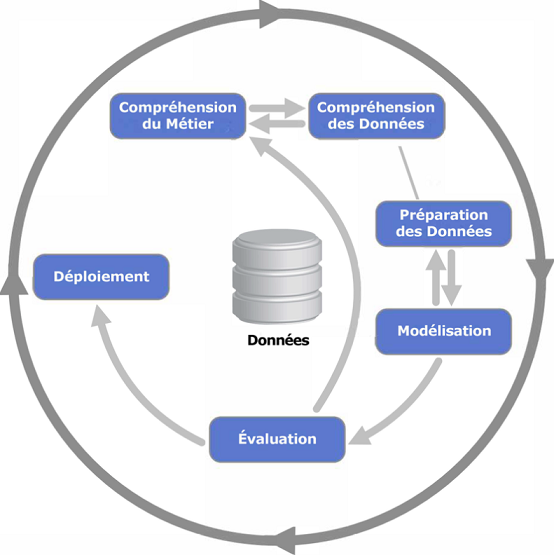

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

### CRISP-DM - Business Understanding
#### Determine business objectives

La problématique métier est la suivante : 

"Comment identifier au plus près le prix de vente de maisons situées à Ames, Iowa, en prenant en compte la marge de négociation?"


#### Assess situation
##### Inventory of resources
* personnel
    * Baptiste Andres 🐤
    * Kevin Seewer 🐤
    * Antoine Induni🦅
* data
    * training set et test set fournis par [Kaggle](https://www.kaggle.com/)

##### Requirements, assumptions, and constraints

List the assumptions made by the project. These may be assumptions about the data that can be verified
during data mining, but may also include non-verifiable assumptions about the business related to the
project.

Pour commencer, nous avons essayer de définir ce qui pour nous, pouvais influencer le prix d'un bien immobilier.

1. Quels sont les critères qui, d'après nous, pourraient influencer sur la valeur d'une maison
    - La supperficie totale habitable (m2)
    - Le nombre de chambres
    - Le nombre de salle de bain
    - La supperficie du terrain
    - L'année de construction et de rénovation
    - La hauteur sous-plafond
    - Le style architectural
    - La présence ou non d'un garage
    - La présence ou non de balcons
    - La présence ou non de cave/sous-sol et grenier
    - La modernité des systèmes de chauffage et d'évacuation des eaux usées
    - La modernité de la cuisine et des pièces d'eau
    - La proximité des transports publiques et des axes routiers
    - La proximité avec les commerces et des lieux de loisirs
    - La proximité avec les écoles et le lieu de travail
    - La réputation du quartier (voisinage)

2. Qu'est-ce qui, selon moi, pourrait faire varier la marge de négociation
    - Le budget de l'acheteur
    - Le taux moyen de négociation pour les biens immobiliters dans la région
    - Les taux hypothécaires du marché actuel
    - La quantité de biens similaires dans la même zone
    - La durée de parution de l'annonce de vente
    - Le nombre de visite d'un bien
 
Comment vérifier?

##### Risks and Contingencies
* Prix ne correspondant pas à la réalité, perte à la vente ou à l'achat
##### Terminology
* TBD?

##### Costs and Benefits
Estimate costs for data collection
* Estimate costs of developing and implementing a solution
* Identify benefits (e.g., improved customer satisfaction, ROI, and increase in revenue)
* Estimate operating costs

#### Determine data mining goals

##### Data mining goals

* Prédire le prix de vente de chaque maison, pour chaque ID dans le jeux de test, nous devons pouvoir prédire le prix de chaque variable SalePrice. 

#####  Data mining success criteria
Prix proche de la valeur du marché?

#### Produce project plan
##### Project plan
* Sprint de 2 semaines
* Restitution le 07.06.2020

##### Initial assessment of tools and techniques
* [Python](https://www.python.org/) 👍
* [Jupyter Notebook](https://jupyter.org/) 👍
* [pandas](https://pandas.pydata.org/) 👍
* [NumPy](https://numpy.org/) 👍
* [scikit-learn](https://scikit-learn.org/) 👍
* [Matplotlib](https://matplotlib.org/) 👍

### CRISP-DM - Data Understanding

* Collect initial data
* Describe data
* Explore data
* Verify data quality

#### Chargement des données de test
* Utilisation de Pandas
* Création d'un Pandas DataFrame depuis le csv

In [105]:
#importons les bibliothèques
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import boxcox_normmax
from sklearn.model_selection import train_test_split

In [106]:
def supprimeColonne(dataset,maximumMissing):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcent'])
    dataset = dataset.drop((missing_data[missing_data['Total'] > maximumMissing]).index,1)
    return dataset;

def prepare_data(df):
    #df['SalePrice'] = df['SalePrice'].map(lambda x: np.log1p(x)) #autre solution?
    df['SalePrice'] = np.log1p(df['SalePrice'])
    

def convert_price(df):
    df['SalePrice'] = np.expm1(df['SalePrice'])

In [107]:
#chargement du fichier de train
df_train = pd.read_csv('train.csv')
#chargement du fichier de test
df_test = pd.read_csv('test.csv')

In [108]:
##profile_report = ProfileReport(df_train)

In [109]:
##profile_report.to_notebook_iframe()

In [110]:
#affichage des dimensions du DataFrame. On obtient 1460 rows et 81 colonnes
df_train.shape

(1460, 81)

In [111]:
#affichage du nom des 81 colonnes
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [112]:
#affichage des 5 premières lignes
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Listes des colonnes du dataset

    SalePrice - Prix de vente ( la valeur à identifier)
    MSSubClass:Classe de la construction
    MSZoning: classification de la zone
    LotFrontage: Pieds linéaires de rue reliés à la propriété
    LotArea: taille du terrain en pieds au carré
    Street: type de route d'acces
    Alley: type d'allée d'accès
    LotShape: Forme générale de la propriété
    LandContour: la platitude de la propriété
    Utilities: types d'utilisation possible 
    LotConfig: Configuration de la propriété
    LandSlope: pente
    Neighborhood: Emplacements physiques dans les limites de la ville d'Ames
    Condition1: Proximité de la route principale ou du chemin de fer
    Condition2: Proximité de la route principale ou du chemin de fer (si les deux sont présents)
    BldgType: Type of dwelling
    HouseStyle: Type d'habitation
    OverallQual: Matière globale et qualité de finition
    OverallCond: Évaluation de l'état général
    YearBuilt: Date de construction d'origine
    YearRemodAdd: date de réstauration
    RoofStyle: Type de plafond
    RoofMatl: matériel du plafond
    Exterior1st: Revêtement extérieur sur maison
    Exterior2nd: Revêtement extérieur sur maison (si plus d'un matériel)
    MasVnrType: Type de placage de maçonnerie
    MasVnrArea: Surface de placage de maçonnerie en pieds carrés
    ExterQual: Qualité des matériaux extérieurs
    ExterCond: État actuel du matériau à l'extérieur
    Foundation: Type de fondation
    BsmtQual: Hauteur du sous-sol
    BsmtCond: État général du sous-sol
    BsmtExposure: Murs de sous-sol au rez-de-chaussée ou au rez-de-jardin
    BsmtFinType1: Qualité de la surface finie du sous-sol
    BsmtFinSF1: Type 1 finis en pieds carrés
    BsmtFinType2: Qualité de la deuxième zone finie (si présente)
    BsmtFinSF2: Type 2 finis en pieds carrés
    BsmtUnfSF: Pieds au carrés de sous-sol inachevés
    TotalBsmtSF: Superficie totale en pieds carrés du sous-sol
    Heating: Type de chauffage
    HeatingQC: Heating quality and condition
    CentralAir: Qualité et état du chauffage
    Electrical: Système électrique
    1stFlrSF: Pieds carrés au premier étage
    2ndFlrSF: Pieds carrés au deuxième étage
    LowQualFinSF: Pieds carrés finis de faible qualité (tous les étages)
    GrLivArea: Surface habitable au-dessus du sol (sol) pieds carrés
    BsmtFullBath: Salle de bain complète au sous-sol
    BsmtHalfBath: Salle de bain WC seulement au sous-sol
    FullBath: Salles de bain complètes au-dessus du niveau du sol
    HalfBath: Demi-bains au-dessus du sol
    Bedroom: Nombre de chambres au dessus du sous-sol
    Kitchen: Nombre de cuisines
    KitchenQual: Qualité de la cuisine
    TotRmsAbvGrd:Nombre total de chambres au-dessus du niveau du sol (n'inclut pas les salles de bains)
    Functional: Évaluation des fonctionnalités domestiques
    Fireplaces: Nombre de cheminées
    FireplaceQu: Qualité cheminée
    GarageType: Localisation d'un garage
    GarageYrBlt: Année de construction du garage
    GarageFinish: Finition intérieure du garage
    GarageCars: Taille du garage en capacité de voiture
    GarageArea: Taille du garage en pieds carrés
    GarageQual: Qualité du garage
    GarageCond: État du garage
    PavedDrive: Allée pavée
    WoodDeckSF: Surface du pont en bois en pieds carrés
    OpenPorchSF: Porche ouvert en pieds carrés
    EnclosedPorch: Porche fermé en pieds carrés
    3SsnPorch: Véranda trois saisons en pieds carrés
    ScreenPorch: Écran de la véranda en pieds carrés
    PoolArea: Espace piscine en pieds carrés
    PoolQC: Qualité de la piscine
    Fence: Qualité de la clôture
    MiscFeature: caractéristique diverse non couverte dans d'autres catégories
    MiscVal: $ Valeur de la fonction divers
    MoSold: Mois vendu
    YrSold: Année de vente
    SaleType: Type de vente
    SaleCondition: Condition de vente

Dataset labellisé
label -> SalePrice

#### Etudes des features
* Quelles colonnes sont relevantes?
Il y a 1460 instance de données d'entrainement et 1460 de données de test. il y a 81 attributs, 36 sont quantititif et 43 de catégorisation ( + l'id et le prix de vente ( SalePrice)

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

In [113]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [114]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [115]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [116]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Nous remarquons que le maximum de SalePrice est de 7'550'000 et le minimum est de 34'900 la valeur minimum n'est pas égal à 0 ce qui montre que les données exploitables sans trop de problèmes. 

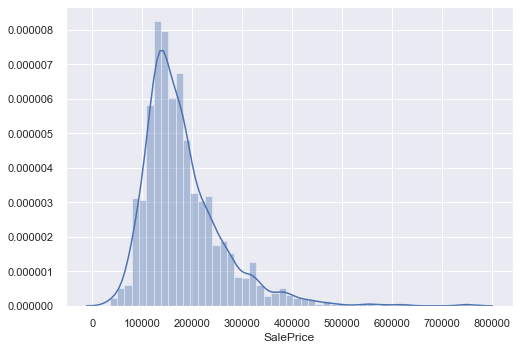

In [117]:
sbn.distplot(df_train['SalePrice']);

Nous remarquons que la distribution est standard avec un pic clair. Cependant, le pic se trouve très à gauche. Ce qui justifie l'utilisation du log

Skewness: 0.121335
Kurtosis: 0.809532


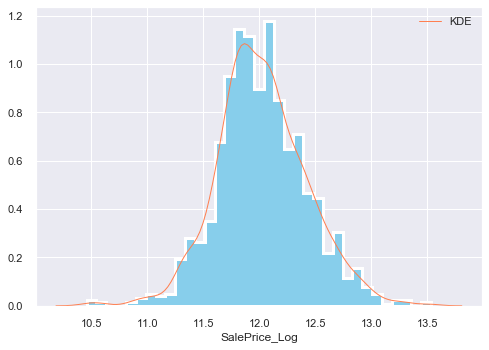

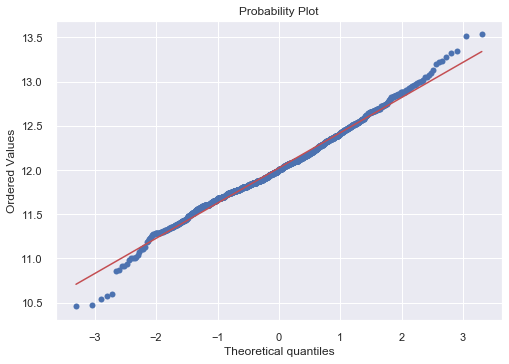

In [118]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

 

sbn.distplot(df_train['SalePrice_Log'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});
 
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

 

fig = plt.figure()
res = stats.probplot(df_train['SalePrice_Log'], plot=plt)
plt.show()

 

# dropping SalePrice
df_train.drop('SalePrice', axis= 1, inplace=True)

In [119]:
###matrice de corrélation

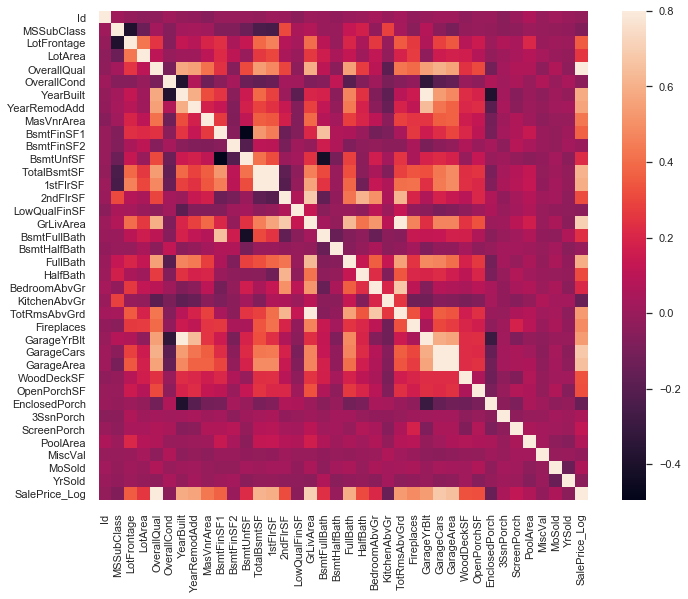

In [120]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sbn.heatmap(corrmat, vmax=.8, square=True);

In [121]:
#from sklearn.preprocessing import LabelEncoder
#from scipy.special import boxcox1p
#from scipy.stats import boxcox_normmax
#
#
#features_to_transform = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
#
#for feature in features_to_transform:
#    df_train[feature] = df_train[feature].apply(str)
#
##Let's check how our features stand now
#numerical_features = df_train.dtypes[df_train.dtypes != "object"].index
#categorical_features = df_train.dtypes[df_train.dtypes == "object"].index
#
#print("We have: ", len(numerical_features), 'Numerical Features')
#print("We have: ", len(categorical_features), 'Categorical Features')
#
#numerical_features
#categorical_features
#
##Let's encode categorical variables
#encode_cat_variables = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
#
#for variable in encode_cat_variables:
#    lbl = LabelEncoder() 
#    lbl.fit(list(df_train[variable].values)) 
#    df_train[variable] = lbl.transform(list(df_train[variable].values))
#
#skewed_features = df_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
#
#norm_target_features = skewed_features[skewed_features > 0.5]
#norm_target_index = norm_target_features.index
#print("#{} numerical features need normalization; :".format(norm_target_features.shape[0]))
#skewness = pd.DataFrame({'Skew' :norm_target_features})
#norm_target_features
#
#for i in norm_target_index:
#    df_train[i] = boxcox1p(data[i], boxcox_normmax(data[i] + 1))

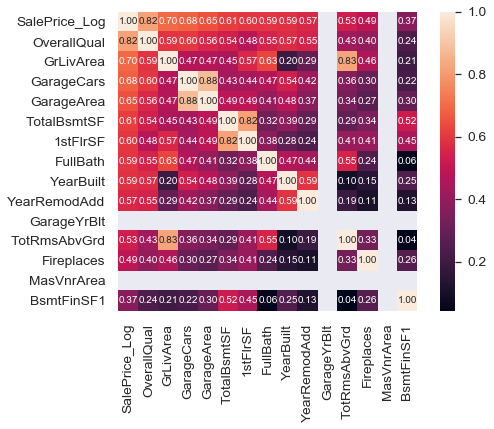

In [122]:
k =15
cols = corrmat.nlargest(k, 'SalePrice_Log')['SalePrice_Log'].index
cm = np.corrcoef(df_train[cols].values.T)
sbn.set(font_scale=1.25)
hm = sbn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

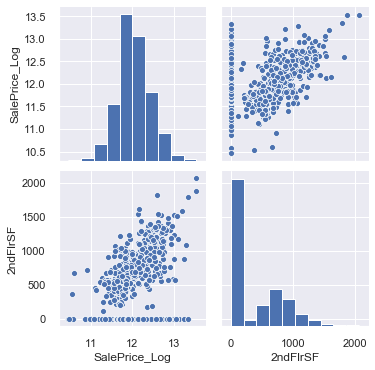

In [123]:
#scatterplot
k =11
sbn.set()
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cols = ['SalePrice_Log','2ndFlrSF']
sbn.pairplot(df_train[cols], height = 2.5)
plt.show();

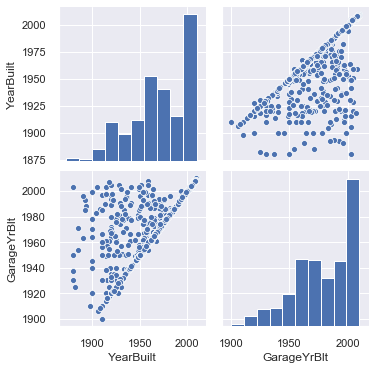

In [124]:
#scatterplot
k =11
sbn.set()
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cols = ['YearBuilt','GarageYrBlt']
sbn.pairplot(df_train[cols], height = 2.5)
plt.show();

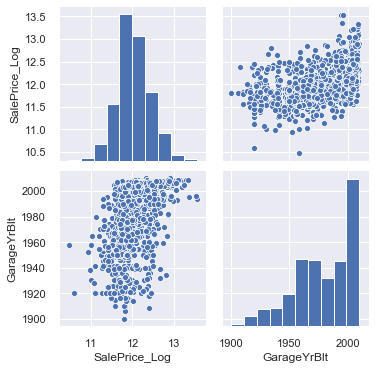

In [125]:
k =11
sbn.set()
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cols = ['SalePrice_Log','GarageYrBlt']
sbn.pairplot(df_train[cols], height = 2.5)
plt.show();

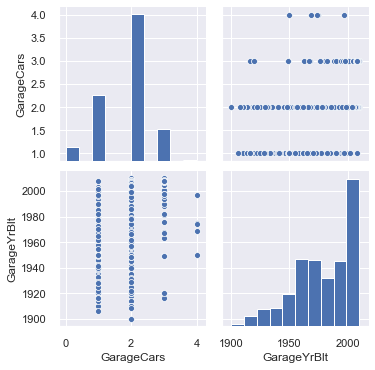

In [126]:
sbn.set()
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cols = ['GarageCars','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual']

sbn.pairplot(df_train[cols], height = 2.5)
plt.show();

In [127]:
features_fill_na_0 = ['GarageYrBlt']

#### Select Data
##### Sélection des enregistrements (lignes)
Tous les enregistrements seront utilisés (train & test)

##### Sélection des attributs ou des caractéristiques (colonnes)
Nous allons sélectionner les 10 meilleures attributs permettant de définir le log du prix. Le fait d'en sélectionner 10 est totalement arbitraire mais nous pensons que cela s'avérera suffisant pour estimer le prix. De plus, un dataset plus petit est plus facile à comprendre et à manipuler.

D'après la matrice de corélation, nous pouvons voir que certains de ces attributs du top 10 ont une forte corélation entre eux et peuvent donc être exclus. Par exemple, GarageCars et GarageArea sont étroitement liés car il n'y a pas beaucoup de variation de surface entre des garages pouvant abriter le même nombre de voiture.

1. OverallQual: Matière globale et qualité de finition
2. GrLiveArea: Surface habitable au-dessus du sol (sol) pieds carrés
3. GarageCars: Taille du garage en capacité de voiture
4. TotalBsmtSF: Superficie totale en pieds carrés du sous-sol
5. 1stFirSF: Pieds carrés au premier étage
6. FullBath: Salles de bain complètes au-dessus du niveau du sol
7. YearBuilt: Date de construction d'origine
8. YearRemodAdd: date de restauration

In [128]:
# Select the ones you want
df_train_select = df_train[['SalePrice_Log', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','TotRmsAbvGrd']]
df_train_select

,SalePrice_Log,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,TotRmsAbvGrd
0,12.247694,7,1710,2,856,2,2003,2003,2003.0,8
1,12.109011,6,1262,2,1262,2,1976,1976,1976.0,6
2,12.317167,7,1786,2,920,2,2001,2002,2001.0,6
3,11.849398,7,1717,3,756,1,1915,1970,1998.0,7
4,12.429216,8,2198,3,1145,2,2000,2000,2000.0,9
...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6,1647,2,953,2,1999,2000,1999.0,7
1456,12.254863,6,2073,2,1542,2,1978,1988,1978.0,7
1457,12.493130,7,2340,1,1152,2,1941,2006,1941.0,9
1458,11.864462,5,1078,1,1078,1,1950,1996,1950.0,5


#### Clean Data
##### Données manquantes

In [129]:
total = df_train_select.isnull().sum().sort_values(ascending=False)
percent = (df_train_select.isnull().sum()/df_train_select.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcent'])
missing_data.head(20)

,Total,Pourcent
TotRmsAbvGrd,0,0.0
GarageYrBlt,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0
FullBath,0,0.0
TotalBsmtSF,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0
SalePrice_Log,0,0.0


Par chance, les attributs sélectionnés n'ont pas de données manquantes

##### Erreurs dans les données
##### Erreurs de mesure

#### Construct Data
Imputation de données?
* MCAR (Missing completely at random)
* MAR (Missing at random)
* MNAR (Missing not at random)

#### Integrate Data
Nous allons utiliser que la source de données fournie par Kaggle, nous n'avons pas besoin de fusionner ou d'ajouter des données.

#### Format Data
comme tri préalable des données?



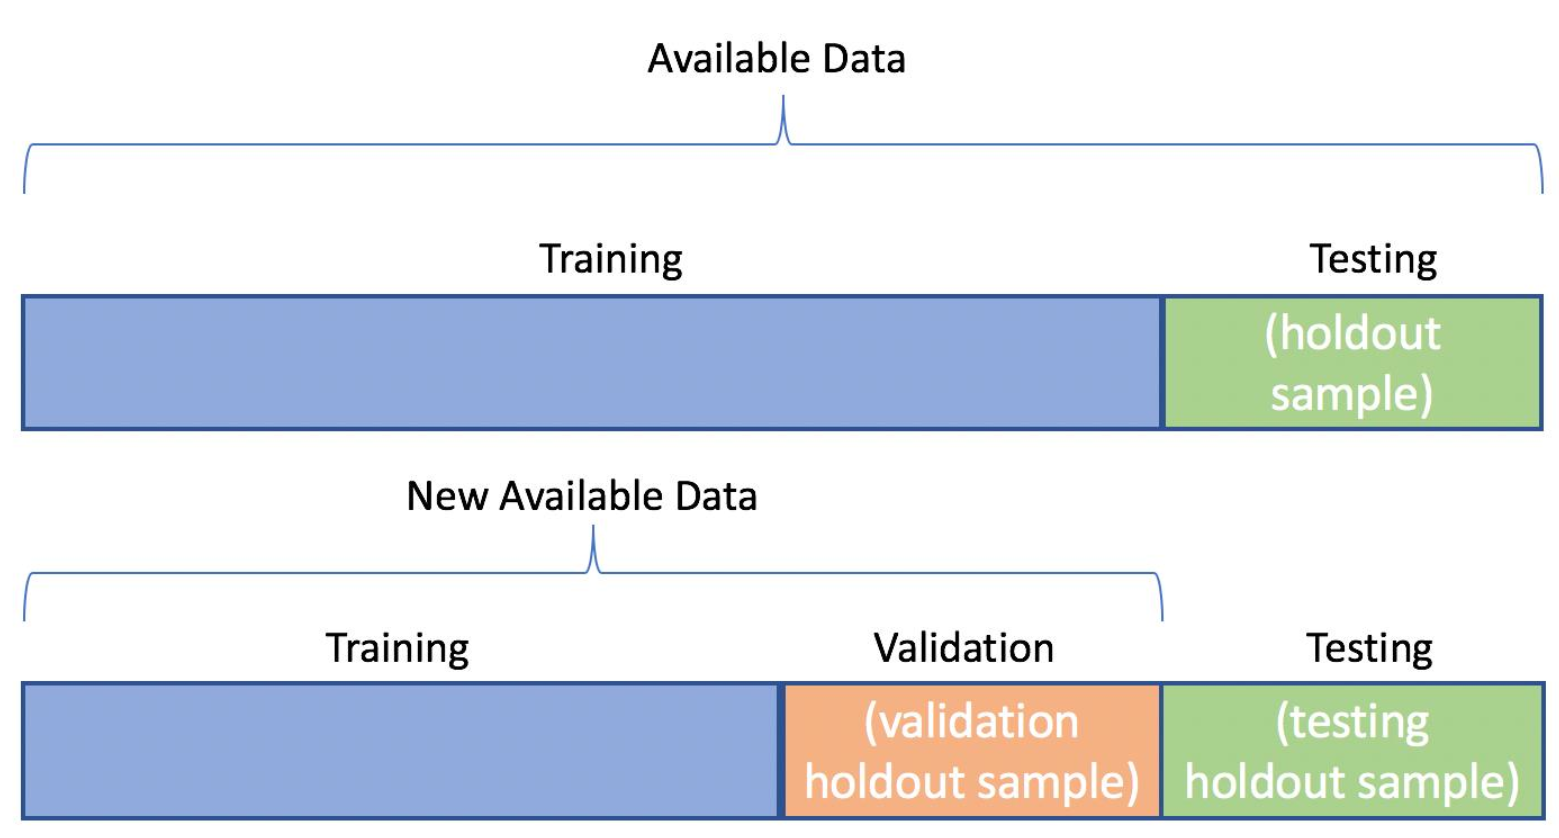


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f


In [130]:
# labels
y = df_train_select[['SalePrice_Log']]

# attributes
X = df_train_select.drop(columns=['SalePrice_Log'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### CRISP-DM - Modeling

#### Select modeling technique
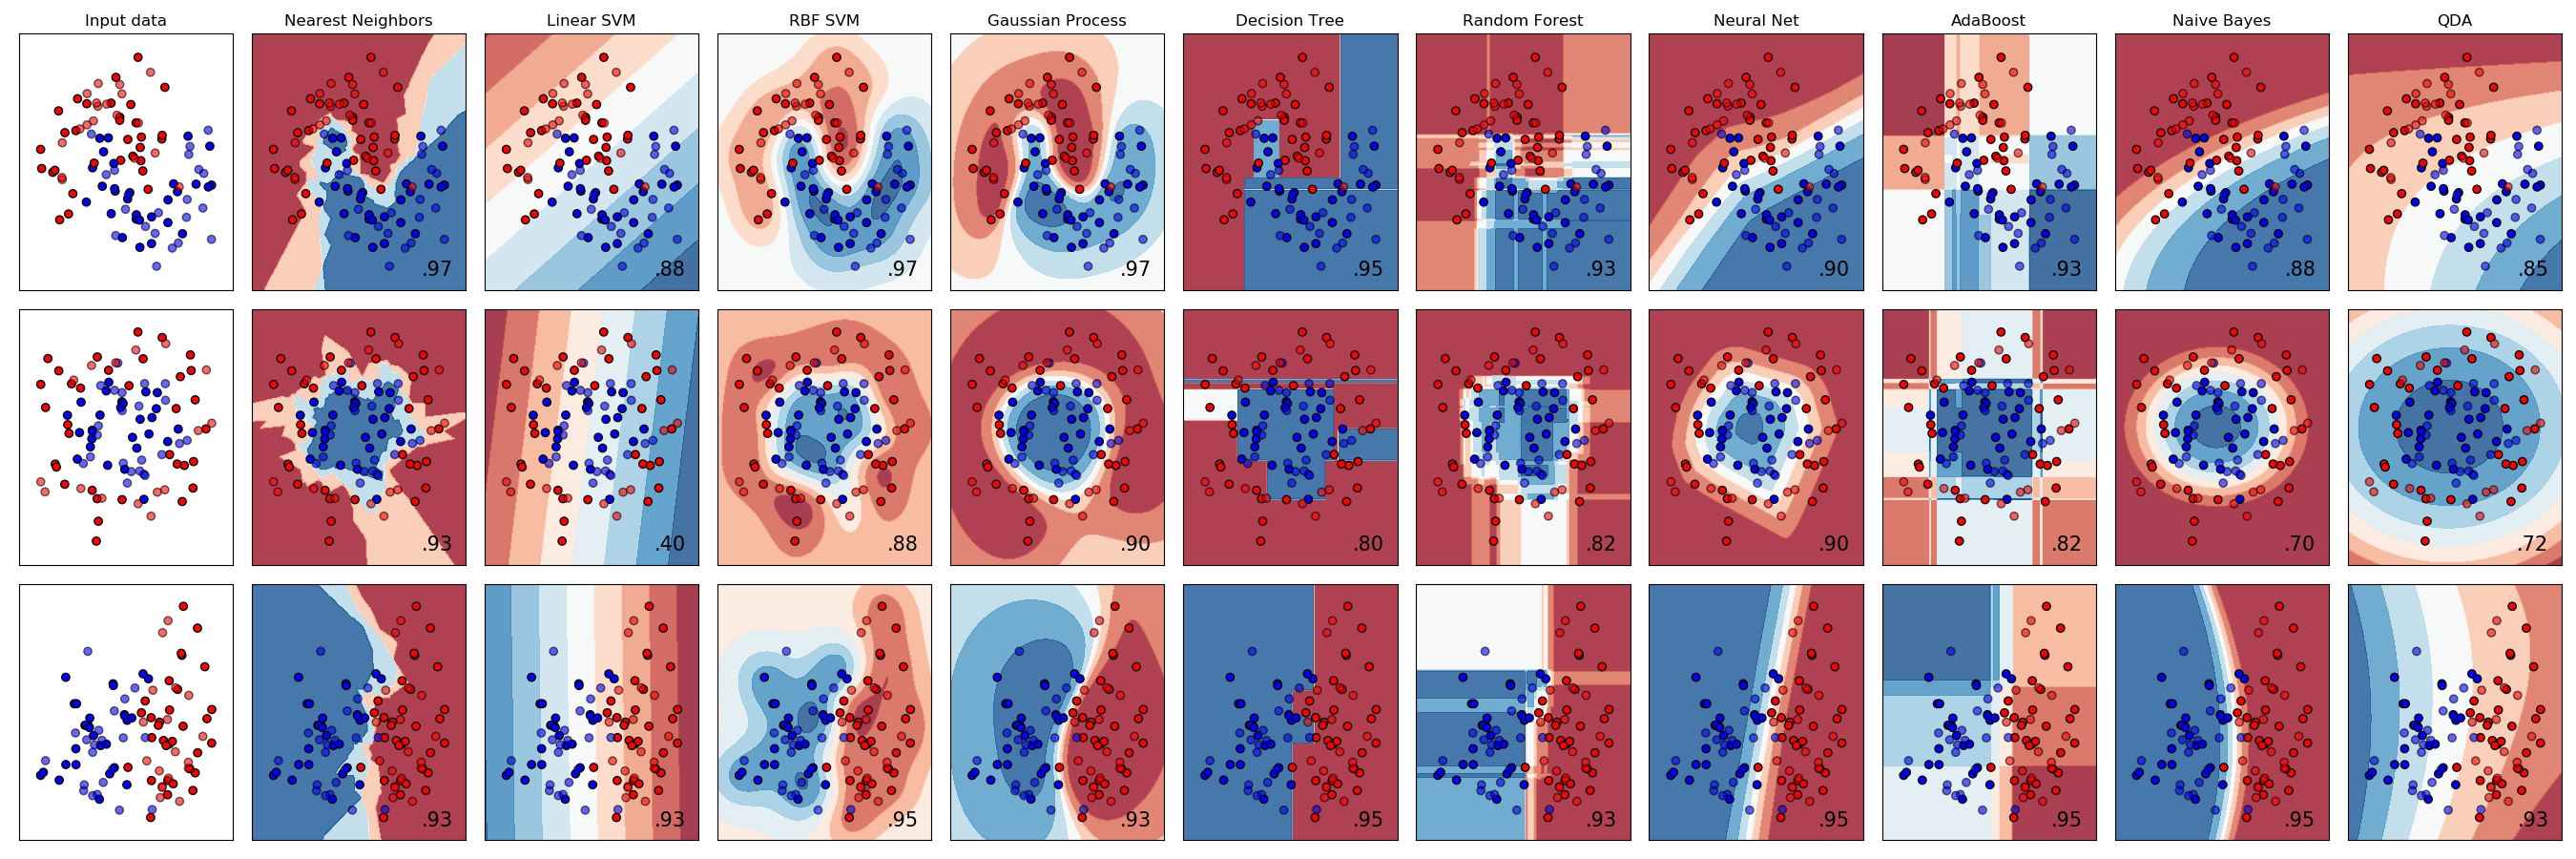
#### Generate test design
Les tests sont fournis et exécuté sur Kaggle
#### Build model
##### Exécution des modèles

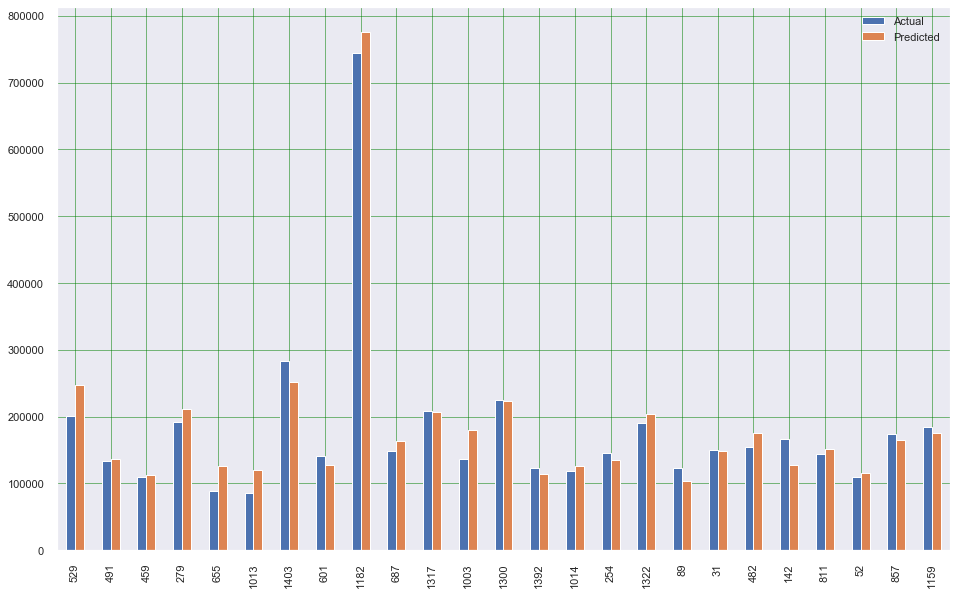

In [131]:
from sklearn import linear_model


# Create linear regression object
regressor = linear_model.LinearRegression()

regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
#print(regressor.intercept_)
#For retrieving the slope:
#print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': np.expm1(y_test['SalePrice_Log']), 'Predicted': np.expm1(y_pred.flatten())})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [132]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11391964476863324
Mean Squared Error: 0.045501452748710425
Root Mean Squared Error: 0.21331069534533523


#### Assess model
##### Iteration 1

```python
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
```
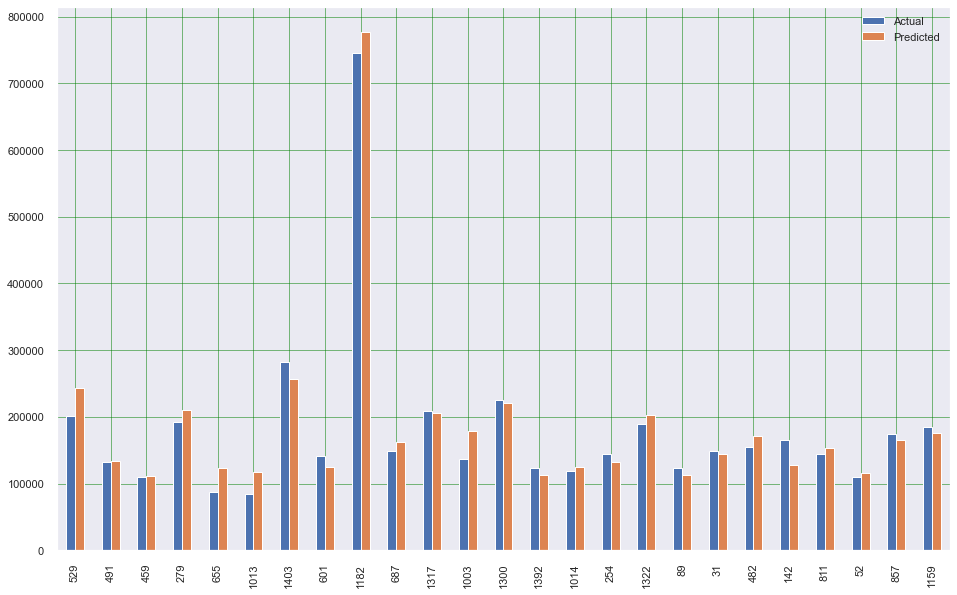
Mean Absolute Error: 0.11299426499221223

Mean Squared Error: 0.044070422556038595

Root Mean Squared Error: 0.20992956570249602

##### Iteration 2
```python
['SalePrice_Log', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt','YearRemodAdd','TotRmsAbvGrd','Fireplaces']
```
Results:
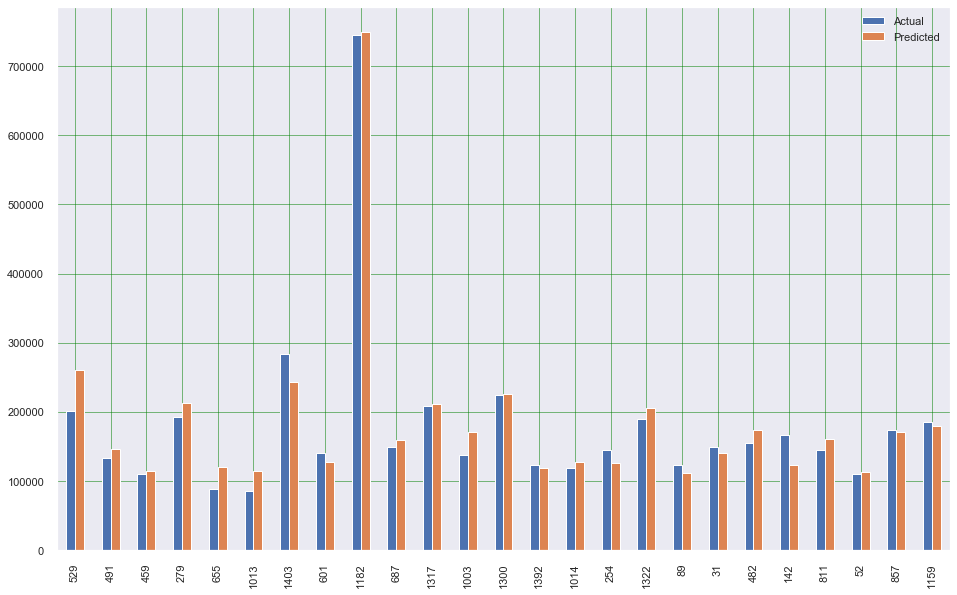
Mean Absolute Error: 0.11139270335709885

Mean Squared Error: 0.04173427980516261

Root Mean Squared Error: 0.20428969578802209

##### Iteration 3
```python
['SalePrice_Log', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','TotRmsAbvGrd']
```
Results:
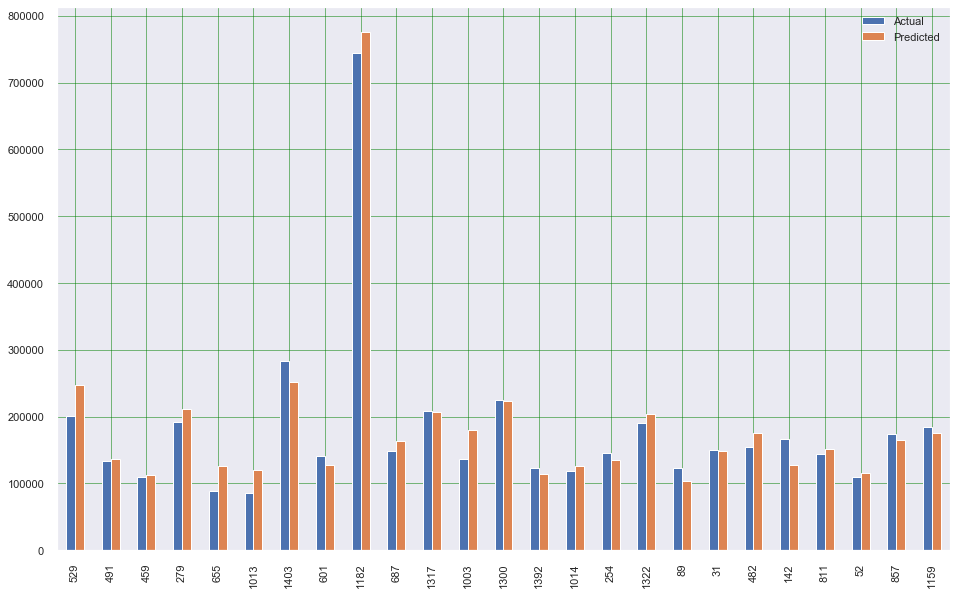
Mean Absolute Error: 0.11391964476863324
    
Mean Squared Error: 0.045501452748710425

Root Mean Squared Error: 0.21331069534533523

### CRISP-DM - Evaluation
Evaluation des résultats en utilisant les critères de réussite commerciale établis au début du projet. Cette étape est primordiale car elle permet d'assurer que les résultats obtenus sont pertinents.

* Evaluate results 
* Review process
* Determine next steps 

### CRISP-DM - Deployment 
* Plan deployment 
* Plan monitoring and maintenance
* Produce final report 
* Review project

l'algo ne peut pas vivre seul. Il faut le réentrainer. Quel est le contexte pour le réentrainer.

Ethique Data Science - leçon 18.05.2020
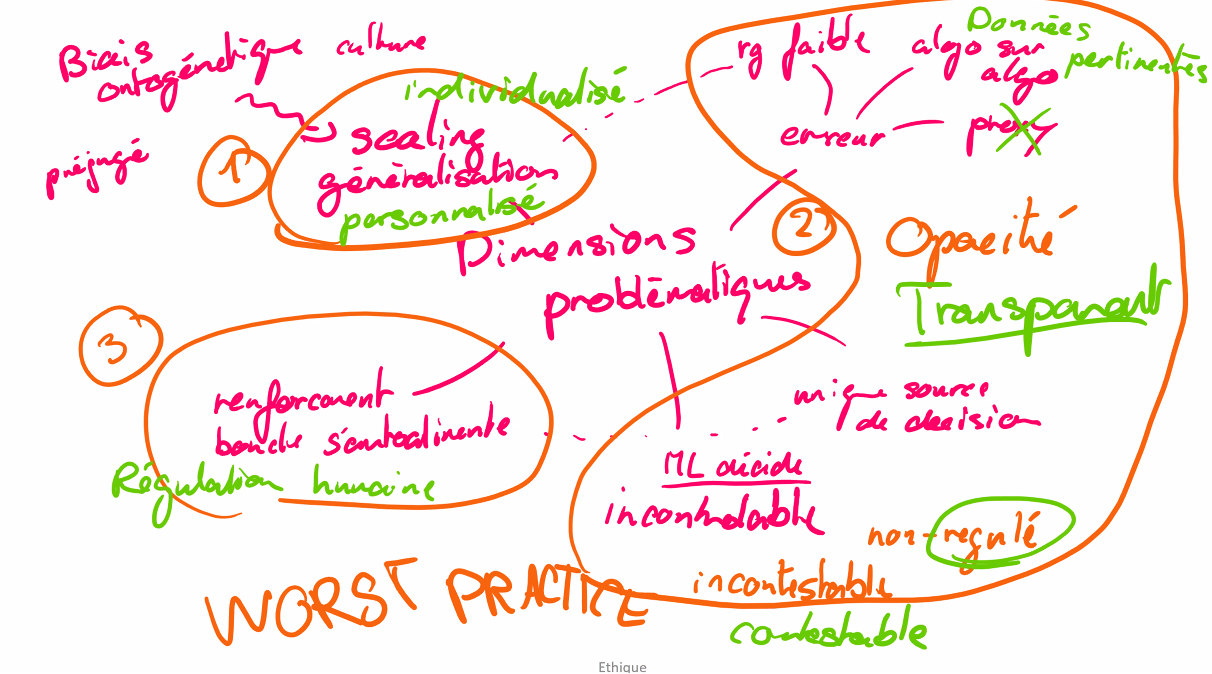